Successfully loaded CSV file: IndianFinancialNews.csv

Article 1:
  Title Guess: 'Close to 14 6 per cent or 35 000 of...'
  Overall Sentiment: Neutral

Article 2:
  Title Guess: 'V vaidyanathan managing director and chief executive will take 30...'
  Overall Sentiment: Negative

Article 3:
  Title Guess: 'Rana kapoor s wife also charged with abetting crime'
  Overall Sentiment: Negative

Article 4:
  Title Guess: 'The bank said it was now gearing up to extend...'
  Overall Sentiment: Positive

Article 5:
  Title Guess: 'Net profit for the financial year ended march 31 2020...'
  Overall Sentiment: Positive

Article 6:
  Title Guess: 'Under the scheme the government will offer 100 per cent...'
  Overall Sentiment: Positive

Article 7:
  Title Guess: 'Hdfc bank cuts base rate by 55 bps sbi calls...'
  Overall Sentiment: Negative

Article 8:
  Title Guess: 'The six member mpc also kept policy stance unchanged at...'
  Overall Sentiment: Positive

Article 9:
  Title Guess: 'The central ban

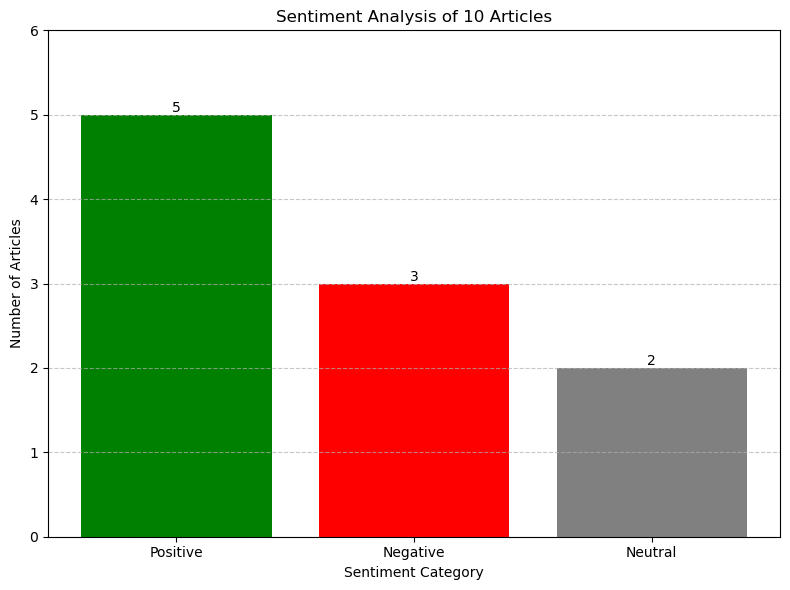


--- Analysis Complete ---


In [4]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import re 

try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    print("Downloading NLTK VADER lexicon...")
    nltk.download('vader_lexicon')
except Exception as e:
    print(f"Could not find VADER lexicon. Please ensure NLTK is installed correctly. Error: {e}")
    exit() 


def generate_short_title(text, max_words=10):
    """Generates a short title from the beginning of the text."""
    if not isinstance(text, str) or not text.strip():
        return "Untitled Article"
   
    words = re.findall(r'\b\w+\b', text.lower())
    if not words:
        return "Untitled Article"
    if len(words) > max_words:
        return ' '.join(words[:max_words]).capitalize() + '...'
    else:
        return ' '.join(words).capitalize()


def analyze_sentiment(text, analyzer):
    """Analyzes sentiment and returns 'Positive', 'Negative', or 'Neutral'."""
    if not isinstance(text, str) or not text.strip():
        return 'Neutral' 

    scores = analyzer.polarity_scores(text)
  
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


csv_file_path = 'IndianFinancialNews.csv'
column_name = 'Description' 


try:
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded CSV file: {csv_file_path}")
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please make sure the file exists and the path is correct.")
    exit() 
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")
    exit() 


if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in the CSV file.")
    print(f"Available columns are: {list(df.columns)}")
    exit() 

try:
    sia = SentimentIntensityAnalyzer()
except NameError:
     print("Error: SentimentIntensityAnalyzer could not be initialized.")
     print("Please ensure NLTK and the VADER lexicon are correctly installed/downloaded.")
     exit()



num_articles_to_process = min(10, len(df))
results = []
sentiments = []
for i in range(num_articles_to_process):
    article_text = df.loc[i, column_name]

    
    if pd.isna(article_text) or not isinstance(article_text, str) or not article_text.strip():
        print(f"\nArticle {i+1}: Skipping row {i} - data in '{column_name}' is missing or not text.")
        
        continue

    short_title = generate_short_title(article_text)
    sentiment = analyze_sentiment(article_text, sia)

    results.append({'title': short_title, 'sentiment': sentiment})
    sentiments.append(sentiment) 

    print(f"\nArticle {i+1}:")
    print(f"  Title Guess: '{short_title}'")
    print(f"  Overall Sentiment: {sentiment}")


if sentiments:
    print("\n--- Generating Sentiment Distribution Bar Graph ---")

   
    sentiment_counts = pd.Series(sentiments).value_counts()

   
    sentiment_counts = sentiment_counts.reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

   
    colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'grey'}
    bar_colors = [colors[sentiment] for sentiment in sentiment_counts.index]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=bar_colors)

   
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center') # va='bottom' places text above bar

    plt.title(f'Sentiment Analysis of {len(sentiments)} Articles')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Number of Articles')
    
    plt.ylim(0, max(sentiment_counts.values) + 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.tight_layout() 
    plt.show() 
else:
    print("\nNo valid articles were processed to generate a graph.")

print("\n--- Analysis Complete ---")